# Problem Set 3
By: Bethany Bailey

## QR Decomposition
### Problem 1

In [3]:
import numpy as np
import scipy
from scipy import linalg as la

In [4]:
def qr_decomp(matrix):
    A = matrix
    (m, n) = A.shape
    Q = np.copy(A)
    R = np.zeros(shape = [n, n])
    for i in range(n):
        R[i, i] = la.norm(Q[:, i])
        Q[:, i] = Q[:, i] / R[i, i]
        for j in range(i+1, n):
            R[i, j] = Q[:, j].T @ Q[:, i]
            Q[:, j] = Q[:, j] - R[i, j] * Q[:, i]
    return Q, R

In [5]:
A = np.random.random((6,4))
Q,R = la.qr(A, mode="economic")
print(A.shape, Q.shape, R.shape)

(6, 4) (6, 4) (4, 4)


In [6]:
Q2, R2 = qr_decomp(A)

In [7]:
print(np.allclose(np.triu(R), R))
print(np.allclose(Q.T @ Q, np.identity(4)))
print(np.allclose(Q @ R, A))

True
True
True


In [8]:
print(np.allclose(np.triu(R2), R2))
print(np.allclose(Q2.T @ Q2, np.identity(4)))
print(np.allclose(Q2 @ R2, A))

True
True
True


### Problem 2

In [9]:
def abs_det(A):
    Q, R = qr_decomp(A)
    abs_det = np.absolute(np.diag(R).prod())
    
    return abs_det

In [10]:
# Confirm test
A = np.random.random((4,4))
print(A)
print(abs_det(A))
print(abs(la.det(A)))

[[ 0.99429617  0.6997198   0.29132242  0.75662401]
 [ 0.5363157   0.85823686  0.21830255  0.06787285]
 [ 0.54791766  0.54841941  0.43374504  0.47897001]
 [ 0.41723709  0.75796925  0.42266537  0.55432341]]
0.04779965242
0.04779965242004629


### Problem 3

In [11]:
A = np.random.random((4,4))
b = np.random.random((4))

In [12]:
def solve_x(A, b):
    Q, R = qr_decomp(A)
    y = Q.T @ b
    x = la.inv(R) @ y
    
    return x

### Problem 4

In [13]:
def householder(A):
    m, n = A.shape
    R = np.copy(A)
    Q = np.eye(m)
    for k in range(n - 1):
        u = np.copy(R[k:,k])
        sign = lambda x: 1 if x >= 0 else -1
        u[0] = u[0] + sign(u[0]) * la.norm(u)
        u = u / la.norm(u)
        R[k:,k:] = R[k:,k:] - 2 * np.outer(u, (u.T @ R[k:,k:])) 
        Q[k:,:] = Q[k:,:] - 2 * np.outer(u,(u.T @ Q[k:,:]))
        
    return Q.T, R

In [14]:
A = np.random.random((5, 3))
Q,R = la.qr(A)              
print(A.shape, Q.shape, R.shape)
print(np.allclose(Q @ R, A))

(5, 3) (5, 5) (5, 3)
True


### Problem 5

In [15]:
def hessenberg(A):
    m, n = A.shape
    H = np.copy(A)
    Q = np.eye(m)
    for k in range(n - 2):
        u = np.copy(H[k+1:,k])
        sign = lambda x: 1 if x >= 0 else -1
        u[0] = u[0] + sign(u[0]) * la.norm(u)
        u = u / la.norm(u)
        H[k+1:,k:] = H[k+1:,k:] - 2 * np.outer(u, u.T @ H[k+1:,k:])
        H[:,k+1:] = H[:,k+1:] - 2 * np.outer(H[:,k+1:] @ u, u.T)
        Q[k+1:,:] = Q[k+1:,:] - 2 * np.outer(u, u.T @ Q[k+1:,:])
        
    return H, Q.T

In [16]:
A = np.random.random((8,8))
H, Q = la.hessenberg(A, calc_q=True)
H1, Q1 = hessenberg(A)

In [17]:
print(np.allclose(np.triu(H, -1), H))
print(np.allclose(Q @ H @ Q.T, A))

True
True


In [18]:
print(np.allclose(np.triu(H1, -1), H1))
print(np.allclose(Q1 @ H1 @ Q1.T, A))

True
True


## Least Squares and Eigenvalues
### Problem 1

In [19]:
def solve_normal(A, b):
    m , n = A.shape
    
    if np.linalg.matrix_rank(A) != n:
        raise ValueError('A is not full rank')
    if len(b) != m:
        raise ValueError('b is not be n x 1 vector')
        
    Q, R = la.qr(A, mode='economic')
    x = la.solve_triangular(R, Q.T @ b)
    return xx = solve_normal(A, b)

In [20]:
A = np.random.random((5,3))
b = np.random.random(5)
x = solve_normal(A, b)
print(np.allclose(A.T @ A @ x, A.T @ b))

True


### Problem 2

In [21]:
housing = np.load('housing.npy')

In [22]:
year = housing[:,0]
b = housing[:,1]
A = np.column_stack((year, np.ones(len(year))))

In [23]:
x = solve_normal(A, b)

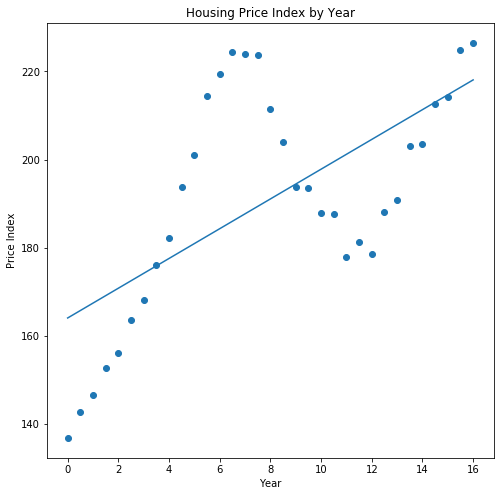

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(year, b)
plt.plot(year, x[0] * year + x[1])
plt.xlabel('Year')
plt.ylabel('Price Index')
plt.title('Housing Price Index by Year')
plt.show()

### Problem 3

In [25]:
year = housing[:,0]
b = housing[:,1]
A = np.column_stack((year, np.ones(len(year))))

In [26]:
def poly_fit(year, b, degree):
    vander = np.vander(year, degree)
    x = la.lstsq(vander, b)[0]
    
    return x, vander

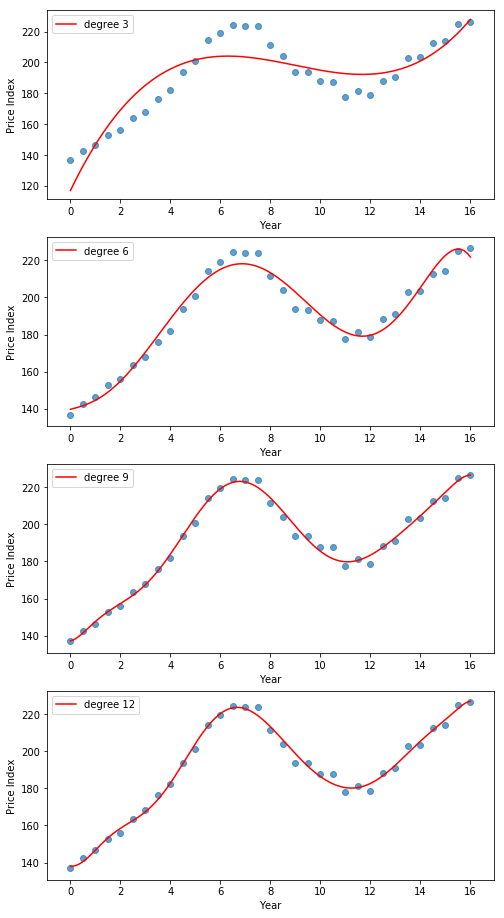

In [27]:
%matplotlib inline

fig, ax = plt.subplots(4,1, figsize=(8,16))
degrees = np.array([3, 6, 9, 12])
grid = np.linspace(0, 16, 1000)

for count, deg in enumerate(degrees):
    x, vander = poly_fit(year, b, deg + 1)
    yhat = np.vander(grid, deg + 1) @ x
    
    ax[count].plot(grid, yhat, 'r', label='degree {}'.format(deg))
    ax[count].scatter(year, b, alpha=0.7)
    ax[count].set_xlabel('Year')
    ax[count].set_ylabel('Price Index')
    ax[count].legend()

### Problem 4

In [28]:
ellipse = np.load('ellipse.npy')

def plot_ellipse(a,b,c,d,e):
    """ Plot an ellipse of form: ax^2 + bx + cxy + dy + ey^2 = 1 """
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A)) / (2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2)
    plt.gca().set_aspect("equal", "datalim")

In [29]:
n = len(ellipse)
x = ellipse[:, 0]
y = ellipse[:, 1]
A = np.column_stack((x ** 2, x, x * y, y, y ** 2))
b_vec = np.ones(n)
a, b, c, d, e = la.lstsq(A, b_vec)[0]

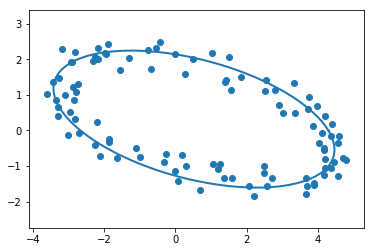

In [30]:
plot_ellipse(a, b, c, d, e)
plt.scatter(x, y, label='Original Data')

### Problem 5

In [31]:
def dom_eigen(A, iterations, tol):
    m, n = np.shape(A) 
    xinit = np.random.rand(n)
    xinit = xinit/la.norm(xinit)
    
    xk = xinit
    curr_iter = 1
    eps = tol + 1
    
    while (curr_iter < iterations and eps > tol):
        xnew = np.dot(A, xk)
        xnew = xnew / la.norm(xnew)
        eps = np.linalg.norm(xnew - xk)
        xk = xnew
        curr_iter += 1
    return np.dot(xk.T, np.dot(A, xk)), xk

In [32]:
# Construct a random matrix with positive entries.
A = np.random.random((10,10))
# Compute the eigenvalues and eigenvectors of A via SciPy.
eigs, vecs = la.eig(A)
# Get the dominant eigenvalue and eigenvector of A.
# The eigenvector of the kth eigenvalue is the kth column of 'vecs'.
loc = np.argmax(eigs)
lamb, x = eigs[loc], vecs[:,loc]
lamb1, x1 = dom_eigen(A, 100, 1e-12)

In [33]:
lamb

(5.5128159347755243+0j)

In [34]:
lamb1

5.5128159347755066

In [35]:
# Verify that Ax = lambda x.
np.allclose(A @ x1, lamb1 * x1)

True

### Problem 6

In [36]:
def qr_algorithm(A, iterations, tol):
    
    m, n = A.shape
    S = la.hessenberg(A)
    
    for k in range(iterations):
        Q, R = la.qr(S, mode='economic')
        S = R @ Q
                        
    eigs = []
    i = 0
        
    while i < n:        
        if (S[i, i] == np.diag(S)[-1]):
            eigs.append(S[i, i])
        elif S[i+1, i] < tol:
            eigs.append(S[i, i])
        else:
            a = 1
            b = -(S[i, i] + S[i+1, i+1])
            c = (S[i, i] * S[i+1, i+1] - S[i, i+1] * S[i+1, i])
            eig1 = (-b + cmat.sqrt(b ** 2 - 4*a*c)) / (2*a)
            eig2 = (-b - cmat.sqrt(b ** 2 - 4*a*c)) / (2*a)
            eigs.append(eig1, eig2)
            i = i + 1
        i = i + 1
            
    return eigs

In [37]:
A = np.random.random((6,6))
A = A + A.T
eigs, vecs = la.eig(A)
eigs1 = qr_algorithm(A, 1000, 1e-12)

In [38]:
eigs

array([ 5.95101614+0.j,  1.00518479+0.j,  0.18597804+0.j, -0.08840973+0.j,
       -1.40003527+0.j, -1.62745371+0.j])

In [39]:
eigs1

[5.9510161386513225,
 -1.6274537147660781,
 -1.4000352673403733,
 1.0051847881058147,
 0.18597803671621652,
 -0.088409727541645056]

## SVD and Image Compression
### Problem 1

In [41]:
def compact_SVD(A, tol):
    lamb, V = la.eig(A.conj().T @ A)
    sig = np.sqrt(lamb)

    index = np.argsort(sig)[::-1]
    sig = sig[index]
    V = V[:, index]
    
    r = len(sig[sig > tol])

    sigC = sig[:r]
    Vc = V[:,:r]
    
    U = A @ (Vc / sigC)
    
    return np.real(U), sigC, np.real(Vc.conj().T)

In [42]:
A = np.random.random((10,5))
U, s, Vh = la.svd(A, full_matrices=False)
U1, s1, Vh1 = compact_SVD(A, 1e-12)

In [43]:
print(s)
print(s1)

[ 3.04426711  1.18600713  1.02995824  0.62785615  0.46482169]
[ 3.04426711+0.j  1.18600713+0.j  1.02995824+0.j  0.62785615+0.j
  0.46482169+0.j]


In [44]:
print(s)
print(s1)

[ 3.04426711  1.18600713  1.02995824  0.62785615  0.46482169]
[ 3.04426711+0.j  1.18600713+0.j  1.02995824+0.j  0.62785615+0.j
  0.46482169+0.j]


### Problem 2

In [45]:
def visualize_SVD(A):
    domain = np.linspace(0, 2*np.pi, 200)
    s = np.zeros((2,200))
    s[0,:] = [np.cos(theta) for theta in domain]
    s[1,:] = [np.sin(theta) for theta in domain]
    
    E = np.array(([1, 0, 0],[0, 0, 1]))
    U, sig, Vh = la.svd(A)
    
    fig, axes = plt.subplots(2,2, figsize=(10,10))
    
    axes[0,0].plot(s[0,:], s[1,:])
    axes[0,0].plot(E[0,:], E[1,:])
    axes[0,0].axis("equal")
    axes[0,1].plot((Vh @s)[0,:], (Vh@s)[1,:])
    axes[0,1].plot((Vh @E)[0,:], (Vh@E)[1,:])
    axes[0,1].axis("equal")
    axes[1,0].plot(((sig*np.eye(2))@Vh@s)[0,:],(sig*np.eye(2)@Vh@s)[1,:])
    axes[1,0].plot(((sig*np.eye(2))@Vh@E)[0,:],(sig*np.eye(2)@Vh@E)[1,:])
    axes[1,0].axis("equal")
    axes[1,1].plot(((U@sig*np.eye(2))@Vh@s)[0,:],(U@(sig*np.eye(2))@Vh@s)[1,:])
    axes[1,1].plot((U@(sig*np.eye(2))@Vh@E)[0,:],(U@(sig*np.eye(2))@Vh@E)[1,:])
    axes[1,1].axis("equal")

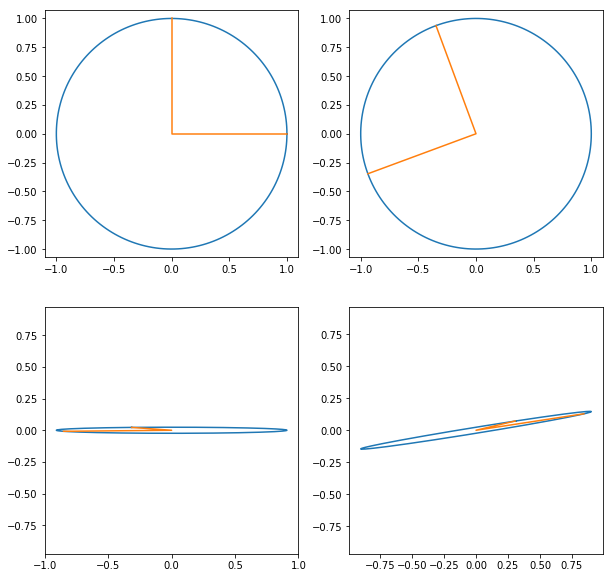

In [46]:
A = np.random.random((2,2))
visualize_SVD(A)

### Problem 3

In [47]:
def truncated_SVD(A, s):
    U, sv, Vh = la.svd(A, full_matrices=False)

    if s > len(sv):
        raise ValueError("S is greater than the number of nonzero singular values of A.")
        
    U1 = U[:,:s]
    sv1 = sv[:s]
    Vh1 = Vh[:s,:]
    
    numEntries = np.size(U1) + np.size(sv1) + np.size(Vh1)
    
    return U1, sv1, Vh1, numEntries

In [48]:
A = np.random.random((20, 10))
A.size

200

In [49]:
U1, sv1, Vh1, numEntries = truncated_SVD(A, s=5)
numEntries

155

In [50]:
np.linalg.matrix_rank(U1 @ np.diag(sv1) @ Vh1)

5

### Problem 4

In [51]:
def truncated_SVD_s(A, tol):
    U, sv, Vh = la.svd(A, full_matrices=False)
    locs1 = np.argmax(sv < tol)
    
    print(locs1)
    if tol <= sv[len(sv)-1]:
        raise ValueError("A cannot be approximated within the tolerance by a matrix of lesser rank.")
    
    U1 = U[:,:locs1]
    sv1 = sv[:locs1]
    Vh1 = Vh[:locs1, :]
    
    numEntries = np.size(U1) + np.size(sv1) + np.size(Vh1)
    
    return U1, sv1, Vh1, numEntries

In [52]:
U1, sv1, Vh1, numEntries = truncated_SVD_s(A, tol=1)
numEntries

6


186

In [53]:
np.linalg.matrix_rank(U1 @ np.diag(sv1) @ Vh1)

6

In [54]:
# Test less than 1
np.linalg.norm(A - (U1 @ np.diag(sv1) @ Vh1), ord=2)

0.91042210243451638

### Problem 5

In [55]:
def compress_image(filename, s):
    image = plt.imread(filename) / 255.
    orig = np.size(image)
    
    R = image[:, :, 0]
    G = image[:, :, 1]
    B = image[:, :, 2]
    R1, Rsv1, RVh1, numEntriesR1 = truncated_SVD(R, s)
    G1, Gsv1, GVh1, numEntriesG1 = truncated_SVD(G, s)
    B1, Bsv1, BVh1, numEntriesB1 = truncated_SVD(B, s)
    Rapprox = R1 @ np.diag(Rsv1) @ RVh1
    Rapprox = np.clip(Rapprox, 0, 1)
    Gapprox = G1 @ np.diag(Gsv1) @ GVh1
    Gapprox = np.clip(Gapprox, 0, 1)
    Bapprox = B1 @ np.diag(Bsv1) @ BVh1
    Bapprox = np.clip(Bapprox, 0, 1)
    combine = np.dstack((Rapprox, Gapprox, Bapprox))
    numEntries1 = numEntriesR1 + numEntriesG1 + numEntriesB1
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
    ax1.imshow(image)
    ax2.imshow(combine)
    
    plt.suptitle('Compressing Images of Hubble')

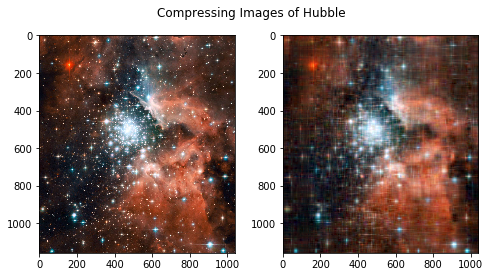

In [56]:
compress_image('hubble.jpg', 20)

## Drazin Inverse
### Problem 1

In [58]:
def is_drazin(A, k, A_D):
    if not np.allclose(A @ A_D, A_D @ A):
        return False
    if not np.allclose(np.linalg.matrix_power(A, k+1) @ A_D, np.linalg.matrix_power(A, k)):
        return False
    if not np.allclose(A_D @ A @ A_D, A_D):
        return False
    else:
        return True

In [59]:
A = np.array([[1,3,0,0], [0,1,3,0], [0,0,1,3], [0,0,0,0]])
AD = np.array([[1,-3,9,81], [0,1,-3,-18], [0,0,1,3], [0,0,0,0]])
B = np.array([[1,1,3], [5,2,6], [-2,-1,-3]])
BD = np.zeros((3,3))

true_test = is_drazin(A, 1, AD)
true_test

True

In [60]:
false_test = is_drazin(B, 1, BD)
false_test

False

### Problem 2

In [61]:
def drazin_inv(A, tol=1e-5):
    n,n = A.shape
    sort1 = lambda x: np.absolute(x) > tol
    sort2 = lambda x: np.absolute(x) <= tol
    
    Q1, S, k1 = la.schur(A, sort=sort1)
    Q2, T, k2 = la.schur(A, sort=sort2)
    
    U = np.column_stack((S[:,:k1], T[:,:n-k1]))
    Uinv = la.inv(U)
    V = Uinv @ A @ U
    Z = np.zeros((n,n), dtype=float)
    
    if k1 != 0:
        Minv = la.inv(V[:k1, :k1])
        Z[:k1,:k1] = Minv
    
    return U @ Z @ Uinv

In [62]:
AD = drazin_inv(A, 1e-05)
true1 = is_drazin(A, 1, AD)
true1

True

### Problem 3

In [65]:
def effective_resistance(A):
    m, n = A.shape
    if m != n:
        raise ValueError('A is not a square matrix')
    D = np.diag(A.sum(axis=1))
    L = D - A
    R = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            Lj = np.copy(L)
            Lj[j, :] = np.eye(n)[j]
            Lj = drazin_inv(Lj)
            if i != j:
                R[i, j] = Lj[i, i]            
    
    return R

In [66]:
A = np.array([[0,1,0,0], [1,0,1,0], [0,1,0,1], [0,0,1,0]])
ef_res = effective_resistance(A)

In [67]:
ef_res

array([[ 0.,  1.,  2.,  3.],
       [ 1.,  0.,  1.,  2.],
       [ 2.,  1.,  0.,  1.],
       [ 3.,  2.,  1.,  0.]])

### Problem 4 and Problem 5

In [68]:
import pandas as pd

In [69]:
class LinkPredictor():
    
    def __init__(self, filename):
        
        graph = pd.read_csv(filename, header=None)
        
        self.names = np.unique(np.concatenate((graph[0], graph[1])))
        n = len(self.names)
        
        adj = np.zeros((n, n))
        for i in graph.index:
            name1, name2 = graph[0][i], graph[1][i]
            name1loc = np.where(name1 == self.names)
            name2loc = np.where(name2 == self.names)
            adj[name1loc, name2loc] = 1
            adj[name2loc, name1loc] = 1
        self.adj = adj
        
        self.res = effective_resistance(self.adj)

        
    def predict_link(self, node = None):

        matConnect = self.res * (1 - self.adj)
        
        if node:
            try:
                loc = np.where(self.names == node)
            except KeyError:
                raise ValueError('The node must be in the social network')
            column = matConnect[:, loc]
            minResist = np.min(column[column > 0])
            argMin = np.where(column==minResist)
            return self.names[argMin[0]]
        
        else:     
            minResist = np.min(matConnect[matConnect > 0])
            argMin = np.where(matConnect==minResist)
            return self.names[argMin[0]]   
                
        
    def add_link(self, node1, node2):
    
        try:
            loc1 = np.where(self.names == node1) 
            loc2 = np.where(self.names == node2)
            self.adj[loc1, loc2] = 1
            self.adj[loc2, loc1] = 1
            self.res = effective_resistance(self.adj)
            
        except:
            raise ValueError('The node must be in the social network')

In [70]:
social_network = LinkPredictor('social_network.csv')
social_network.predict_link()

array(['Oliver'], dtype=object)

In [71]:
social_network.add_link('Alan', 'Sonia')
social_network.predict_link('Alan')

array(['Piers'], dtype=object)

## PageRank
### Problem 1

In [72]:
from scipy import sparse

In [73]:
def adj_matrix(filename, N):
    A = sparse.dok_matrix((N, N), dtype=np.float32)
    with open(filename, 'r') as myfile:
        try:
            for line in myfile:
                nums = line.strip().split()
                if len(nums) > 2:
                    continue
                else:
                    A[int(nums[0]), int(nums[1])] = 1
        except:
            raise ValueError('Text file error')
        finally:
            myfile.close()
            
    return A

In [234]:
A = adj_matrix('matrix.txt', 8)
A

<8x8 sparse matrix of type '<class 'numpy.float32'>'
	with 12 stored elements in Dictionary Of Keys format>

### Problem 2

In [235]:
def calculate_K(A, N):
    A[A.sum(axis=1) == 0, :] = np.ones(N)
    D = A.sum(axis=1)
    
    return (A.T / D)

In [236]:
K = calculate_K(A.toarray(), 8)
print(K)

[[ 0.          1.          0.125       0.33333334  0.33333334  0.5         1.
   1.        ]
 [ 0.          0.          0.125       0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.125       0.33333334  0.          0.          0.
   0.        ]
 [ 0.          0.          0.125       0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.125       0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.125       0.          0.33333334  0.          0.
   0.        ]
 [ 0.          0.          0.125       0.33333334  0.33333334  0.5         0.
   0.        ]
 [ 1.          0.          0.125       0.          0.          0.          0.
   0.        ]]


### Problem 3

In [237]:
def pagerank(A, N=None, d=.85, tol=1e-5):
    if N:
        A = A[:N,:N]
    else:
        N = A.shape[0]
    pvec = np.random.random(N)
    K = calculate_K(A, N)
    eps = tol + 1
    while eps > tol:
        pvec_new = d * (K @ pvec) + ((1 - d) / N) * np.ones(N)
        eps = la.norm(pvec_new - pvec)
        pvec = pvec_new
    return pvec_new

In [238]:
pagerank(A.toarray())

array([ 0.43870259,  0.02171029,  0.02786154,  0.02171029,  0.02171029,
        0.02786154,  0.04585394,  0.3946032 ])

### Problem 4

In [239]:
def eigen_steady(A, N=None, d=0.85, tol=1e-5, max_iter=500):
    if N:
        A = A[:N,:N]
    else:
        N = A.shape[0]
    K = calculate_K(A, N)
    B = d * K + ((1-d)/N) * np.ones((N,N))
    eigs, vecs = la.eig(B)

    return (vecs[:,0] / np.sum(vecs[:,0]))


In [240]:
eigen_steady(A.toarray())

array([ 0.43869289-0.j,  0.02171029-0.j,  0.02786154-0.j,  0.02171029-0.j,
        0.02171029-0.j,  0.02786154-0.j,  0.04585394-0.j,  0.39459924-0.j])

### Problem 5

In [241]:
win_lose = []
with open('ncaa2013.csv', 'r') as file:
    file.readline()
    for line in file:
        teams = line.strip().split(',')
        win_lose.append(teams)
        
win_lose = np.array(win_lose)
teams = np.unique(win_lose.flatten())
N = len(teams)
team_id = dict(zip(teams, range(N)))
win_lose_id = np.array([[team_id[win], team_id[lose]] for win, lose in win_lose[:, ]])

In [249]:
A = np.zeros((N, N))
for game in win_lose_id:
    j, i = game
    A[i, j] = 1

In [250]:
p = pagerank(A, d=0.7)
rank_id = p.argsort()[-5:][::-1]

In [251]:
print("The 5 best teams are: ", teams[rank_id])

The 5 best teams are:  ['Duke' 'Butler' 'Louisville' 'Illinois' 'Indiana']


## Conditioning and Stability
### Problem 1

In [89]:
def cond_number(A):
    U,sigma,Vh = la.svd(A)
    if np.min(sigma) == 0:
        return np.inf
    else:
        return np.max(sigma) / np.min(sigma)

In [90]:
A = np.random.random((3, 3))
np.linalg.cond(A)

11.277371323908689

In [91]:
cond_number(A)

11.277371323908685

### Problem 2

In [152]:
import sympy as sy

def experiment():
    # Do experiment 20 times
    w_roots = np.arange(1, 21)
    w_roots = np.sort(w_roots)
    
    x, i = sy.symbols('x i')
    w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
    w_coeffs = np.array(w.all_coeffs())
    
    fig, ax = plt.subplots(1, 1, figsize=(10,10)) 
    plt.scatter(w_roots, np.zeros(20), label='Original') 
    
    absC = np.zeros(100)
    relC = np.zeros(100)
    
    for i in range(100):
        r = np.random.normal(loc=1, scale=1e-10, size=21)
        
        new_coeffs = np.copy(w_coeffs) * r
        new_roots = np.roots(np.poly1d(new_coeffs))
        new_roots = np.sort(new_roots)
        
        plt.scatter(new_roots.real, new_roots.imag, marker=',', color='k', s=1)
        
        absC[i] = la.norm(new_roots - w_roots, np.inf) / la.norm(new_coeffs - w_coeffs, np.inf)
        relC[i] = absC[i] * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)
        
    absCondition = np.mean(absC)
    relCondition = np.mean(relC)
    
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.legend(['Original', 'Perturbed'], loc='upper left')

    return absCondition, relCondition

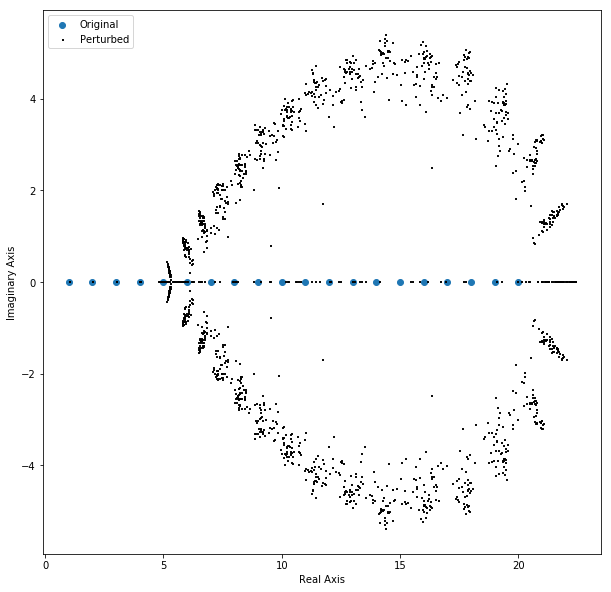

In [153]:
absCondition, relCondition = experiment()

In [154]:
print("Absolute condition number: " + str(absCondition))
print("Relative condition number: " + str(relCondition))

Absolute condition number: 3.52431381189e-09
Relative condition number: 2432439057.79


### Problem 3

In [159]:
def cond_eigen(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j * imags
    
    eigA = la.eigvals(A)
    eigAH = la.eigvals(H + A)
    cond_abs = la.norm(eigA - eigAH) / la.norm(H)
    cond_rel = (la.norm(A) / la.norm(eigA)) * cond_abs
    
    return cond_abs, cond_rel

In [160]:
cond_eigen(A)

(0.65606455359934746, 0.6733013570217864)

### Problem 4

In [165]:
def rel_cond_plot(bounds, res):
    xmin, xmax, ymin, ymax = bounds
    
    vals = np.empty((res, res))
    
    x = np.linspace(xmin, xmax, res)
    y = np.linspace(ymin, ymax, res)
    
    for indx, i in enumerate(x):
        for indy, j in enumerate(y):
            vals[indx, indy] = cond_eigen(np.array([[1, i], [j, 1]]))[1]
    
    X, Y = np.meshgrid(x, y) 
    plt.pcolormesh(x, y, vals, cmap='gray_r')
    plt.colorbar()
    plt.show()

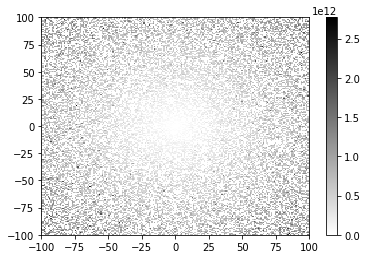

In [166]:
bounds = [-100, 100, -100, 100]
res = 200
rel_cond_plot(bounds, res)

### Problem 5

In [195]:
def two_least_sq(n):
    xk, yk = np.load('stability_data.npy').T
    A = np.vander(xk, n+1)
    
    x_inv = la.inv(A.T @ A) @ A.T @ yk
    inv_error = la.norm(A @ x_inv - yk)
    
    Q, R = la.qr(A, mode='economic')
    x_qr = la.solve_triangular(R, Q.T @ yk)
    error_qr = la.norm(A @ x_qr - yk)
    
    plt.figure(figsize=(10, 6))
    plt.plot(xk, np.polyval(x_inv, xk), label='Normal equations')
    plt.plot(xk, np.polyval(x_qr, xk), label='QR Solver')
    plt.plot(xk, yk, '.')
    plt.legend()
    plt.show()
    
    print("The forward error of the inverse method is ", inv_error)
    print("The forward error of the QR method is ", error_qr)

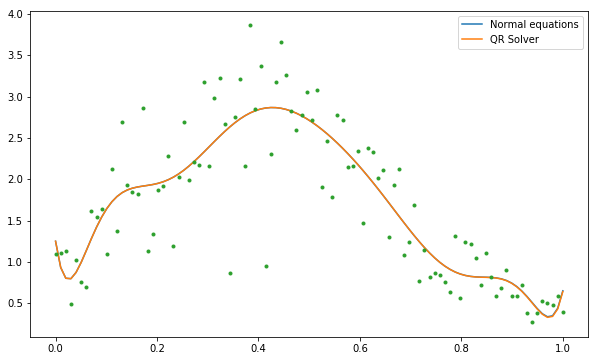

The forward error of the inverse method is  4.644357972815637
The forward error of the QR method is  4.6443095875099045


In [196]:
two_least_sq(10)

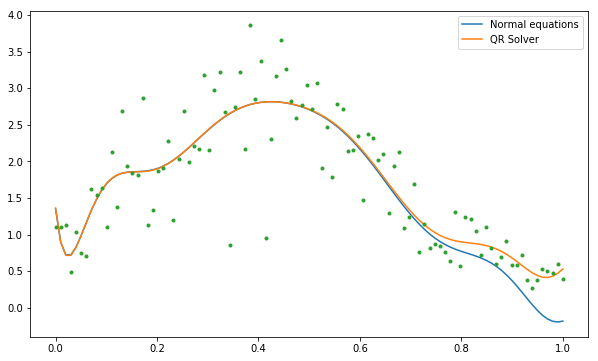

The forward error of the inverse method is  4.968652641564367
The forward error of the QR method is  4.622026000842649


In [197]:
two_least_sq(11)

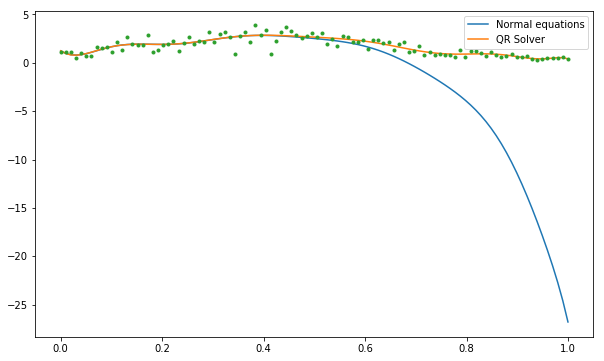

The forward error of the inverse method is  69.7954468017533
The forward error of the QR method is  4.5934080265887065


In [199]:
two_least_sq(12)

### Problem 6

In [210]:
from math import e

def int_error(): 
    x = sy.symbols('x')
    err = []

    for n in np.arange(5, 51, 5):
        n = int(n)
        integral =  float(sy.integrate(((x ** n) * sy.exp(x - 1)), (x, 0, 1)))
        sums = float(((-1) ** n) * sy.subfactorial(n) + ((-1) ** (n + 1)) * (sy.factorial(n) / e))
        err.append(abs(sums - integral) / abs(integral))
    plt.plot(np.arange(5, 51, 5), err)
    plt.yscale('log')
    plt.ylabel('Rel Forward Error')

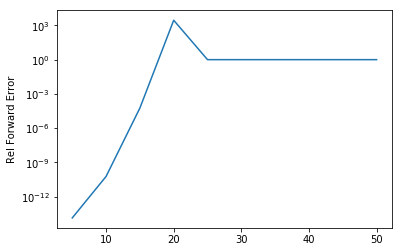

In [211]:
int_error()